In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

dataset=pd.read_csv("Social_Network_Ads.csv")
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


Data Analysis

<Axes: xlabel='Purchased', ylabel='count'>

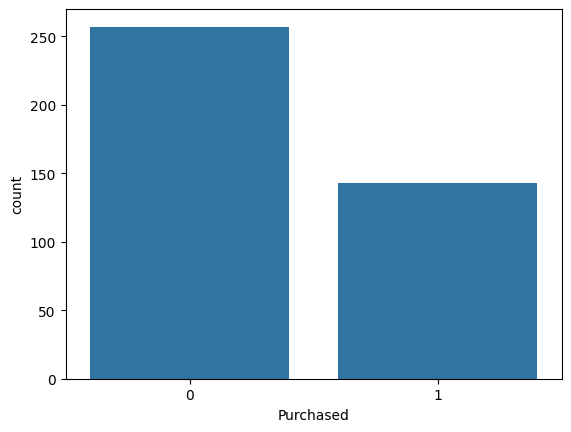

In [4]:
sns.countplot(x="Purchased", data=dataset)
#so very less people purchased

<Axes: xlabel='Purchased', ylabel='count'>

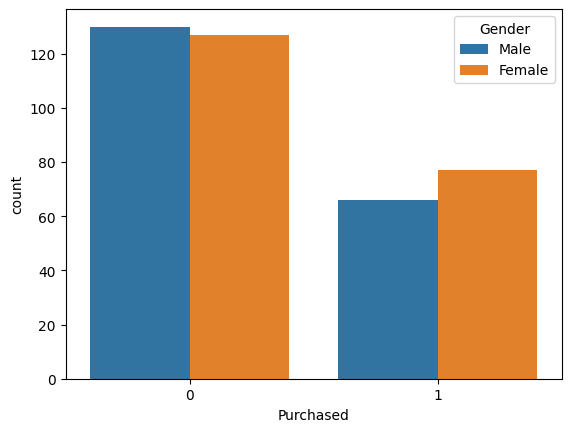

In [5]:
sns.countplot(x="Purchased", hue="Gender", data=dataset)
#more females purchased

<Axes: xlabel='Purchased', ylabel='count'>

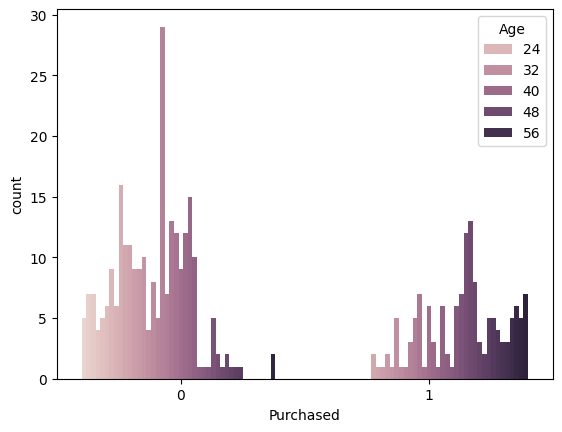

In [6]:
sns.countplot(x="Purchased", hue="Age", data=dataset)
#majority of age around 40 did not purchase
#majority of age around 48 did purchase

<Axes: ylabel='Frequency'>

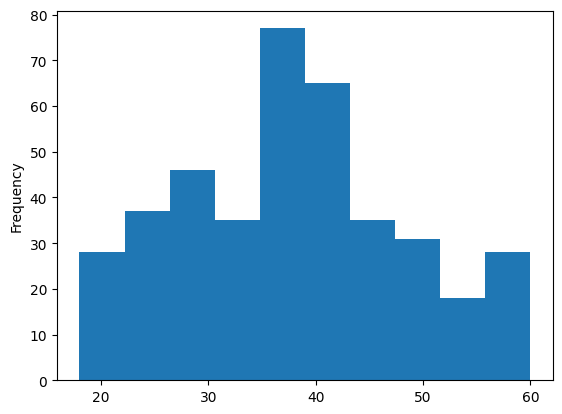

In [7]:
dataset['Age'].plot.hist()
#majority of ppl with age ranging from 35 to 40

<Axes: ylabel='Frequency'>

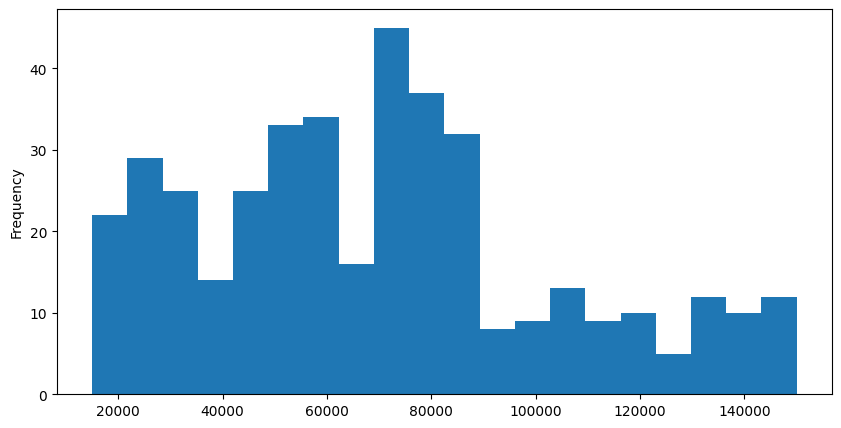

In [8]:
dataset['EstimatedSalary'].plot.hist(bins=20, figsize=(10,5))
#majority of people have salary ranging from 70k to 80k

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


Data Wrangling

In [10]:
dataset.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


In [11]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: >

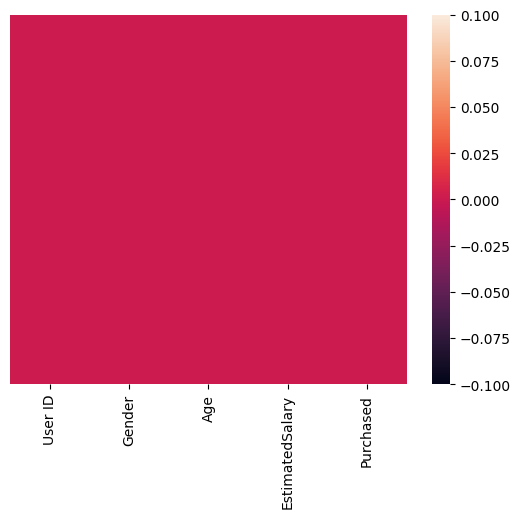

In [12]:
sns.heatmap(dataset.isnull(), yticklabels=False)
#no missing data

In [13]:
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [14]:
#converting string values to integer values for logistic regression
sex=pd.get_dummies(dataset['Gender'], drop_first=True)
sex.head(5)

,Male
0,True
1,True
2,False
3,False
4,True


In [15]:
#concatenate new rows to existing data
dataset=pd.concat([dataset,sex], axis=1)
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,True
1,15810944,Male,35,20000,0,True
2,15668575,Female,26,43000,0,False
3,15603246,Female,27,57000,0,False
4,15804002,Male,19,76000,0,True


In [16]:
dataset['Male']=dataset['Male'].astype(int)
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [18]:
dataset.drop(['User ID','Gender'], axis=1, inplace=True)
dataset.head(5)

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


Train and Test Data

In [20]:
x=dataset.iloc[:,[0,1]].values
y=dataset.iloc[:,2].values
x

array([[    19,  19000],
       [    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000],
       [    48,  41000],
       [    45,  22000],
       [    46,  23000],
       [    47,  20000],
       [    49,  28000],
       [    47,  30000],
       [    29,  43000],
       [    31,  18000],
       [    31,  74000],
       [    27, 137000],
       [    21,  16000],
       [    28,  44000],
       [    27,  90000],
       [    35,  27000],
       [    33,  28000],
       [    30,  49000],
       [    26,  72000],
       [    27,  31000],


In [21]:
y


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [28]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(random_state=0)

In [29]:
logmodel.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [30]:
y_pred=logmodel.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

87.0